# Objectif 

A partir des données des émissions de CO2 des véhicules en **France 2022** (<a href="https://co2cars.apps.eea.europa.eu/?source=%7B%22track_total_hits%22%3Atrue%2C%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22constant_score%22%3A%7B%22filter%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22bool%22%3A%7B%22should%22%3A%5B%7B%22term%22%3A%7B%22year%22%3A2022%7D%7D%5D%7D%7D%2C%7B%22bool%22%3A%7B%22should%22%3A%5B%7B%22term%22%3A%7B%22scStatus%22%3A%22Provisional%22%7D%7D%5D%7D%7D%5D%7D%7D%7D%7D%5D%7D%7D%2C%22filter%22%3A%7B%22bool%22%3A%7B%22should%22%3A%5B%7B%22term%22%3A%7B%22MS%22%3A%22FR%22%7D%7D%5D%7D%7D%7D%7D%2C%22display_type%22%3A%22tabular%22%7D" target="_blank">Lien</a>)

+ 1 - Trouver une relation entre les caractéristiques techniques du véhicule et ses émissions de CO2
+ 2 - Quels sont les éléments techniques qui peuvent-être améliorés pour faire baisser les émission de C02

+ The EU fleet-wide CO2 emission targets set in the Regulation are as follows:
    + 2020 to 2024
    + __Cars: 95 g CO2/kmO2k__
    + Vans: 147 g CO2/km
    + <a href="https://climate.ec.europa.eu/eu-action/transport/road-transport-reducing-co2-emissions-vehicles/co2-emission-performance-standards-cars-and-vans_fr" target="_blank">Lien</a>
    +
    + 2025 to 2029
    + __Cars:  93,6 g CO2/km__
    + Vans: 153,9 g CO2/km
 
      
 Liste des champs: "https://sdi.eea.europa.eu/catalogue/srv/eng/catalog.search#/metadata/0b524cdf-e42a-465c-b0b6-f3300df1b8b6"

 Explication: "https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%2022"

Target: Ewltp (g/km)

In [2]:
import pandas as pd
import numpy as np

In [4]:
df_raw = pd.read_csv(
            "./csv/data_2022.csv",
            index_col="ID",
            low_memory=False)

In [6]:
# Détecter les doublons
df_duplicates = df_raw.duplicated()
# Afficher le nombre de lignes dupliquées
print(f"Nombre de lignes dupliquées : {df_duplicates.sum()}")

Nombre de lignes dupliquées : 899518


In [8]:
pd.options.display.max_columns = None
df = df_raw


# Informations sur le dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1638878 entries, 77798939 to 78020976
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Country               1638878 non-null  object 
 1   VFN                   1638878 non-null  object 
 2   Mp                    1570268 non-null  object 
 3   Mh                    1638878 non-null  object 
 4   Man                   1638878 non-null  object 
 5   MMS                   0 non-null        float64
 6   Tan                   1638878 non-null  object 
 7   T                     1638878 non-null  object 
 8   Va                    1638878 non-null  object 
 9   Ve                    1638878 non-null  object 
 10  Mk                    1638878 non-null  object 
 11  Cn                    1638878 non-null  object 
 12  Ct                    1638878 non-null  object 
 13  Cr                    1638878 non-null  object 
 14  r                     1638878 n

In [13]:
df_raw[["Ft"]].value_counts()

Ft             
PETROL             915122
DIESEL             301588
ELECTRIC           210368
PETROL/ELECTRIC    122421
LPG                 46937
E85                 35876
DIESEL/ELECTRIC      6241
HYDROGEN              193
NG                    132
Name: count, dtype: int64

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
C:\Users\Kogitos\AppData\Local\Temp\ipykernel_25708\514543453.py:23: R

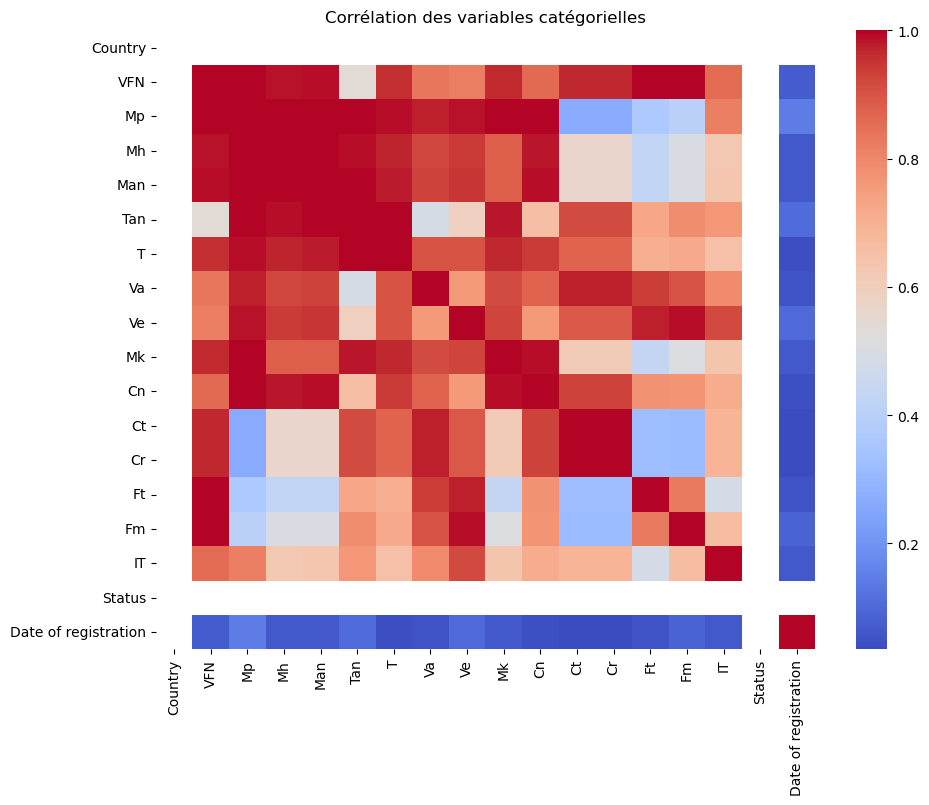

In [22]:
# df_raw.loc[(~df["Mp"].isna()) & (df["Man"].str.contains("PEUGEOT"))][["Mh", "Man"]]
# df.loc[(~df["IT"].isna())]


df_cat = df[df.select_dtypes(include=["object"]).columns]

# pd.DataFrame(df_cat.nunique())
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
# Supposons que df est votre DataFrame contenant les variables catégorielles
# df = pd.DataFrame(...)
# Calcul de la matrice de corrélation catégorielle
cols = df_cat.columns
corr = pd.DataFrame(index=cols, columns=cols)
for col1 in cols:
    for col2 in cols:
        corr.loc[col1, col2] = cramers_v(df[col1], df[col2])
corr = corr.astype(float)
# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.title("Corrélation des variables catégorielles")
plt.savefig("correlation_cat_raw_data.png")
plt.show()


## Correlation variables quantitatives

In [29]:
df_num = df[df.select_dtypes(include=["int64", "float64"]).columns]
df_num.drop(['MMS', 'r', 'Enedc (g/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'year'], inplace=True, axis=1)
df_num.columns

C:\Users\Kogitos\AppData\Local\Temp\ipykernel_36648\2885337261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(['MMS', 'r', 'Enedc (g/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'year'], inplace=True, axis=1)


Index(['m (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Fuel consumption ',
       'Electric range (km)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

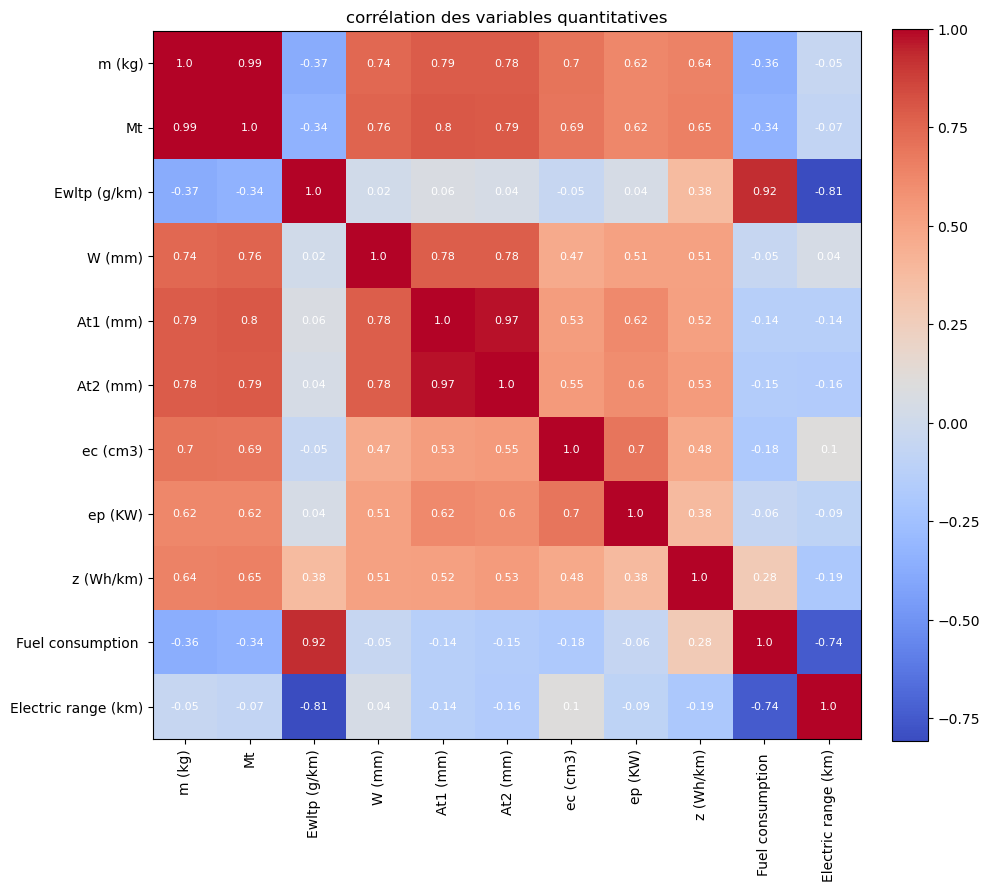

In [31]:
# df_num = df[df.select_dtypes(include=["int64", "float64"]).columns]
correlation_matrix = df_num.corr()
hp_size = 10
plt.clf()
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots()
fig.set_figheight(hp_size)
fig.set_figwidth(hp_size)
im = ax.imshow(correlation_matrix, cmap="coolwarm")
ax.set_xticks(np.arange(len(correlation_matrix)), labels=df_num.columns, rotation=90)
ax.set_yticks(np.arange(len(correlation_matrix)), labels=df_num.columns)

for i in range(len(df_num.columns)):
    for j in range(len(df_num.columns)):
        text = ax.text(j, i, np.around(np.array(correlation_matrix)[i, j], 2), ha="center", va="center", color="w", size=8, rotation=0)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title("corrélation des variables quantitatives")
# sns.heatmap(correlations, annot=True, fmt=".2f", linewidth=.5, cmap="inferno")
plt.savefig("correlation_quantitative_raw_data.png")
plt.show()

## Valeurs nulles

In [34]:
df_na = pd.DataFrame(df.isna().sum()).reset_index()
df_na.rename({0: "NA"}, inplace=True, axis=1)
df_na["% NA"] = np.round((df_na["NA"]/ df.shape[0]) * 100, 2)
df_na

,index,NA,% NA
0,Country,0,0.00
1,VFN,0,0.00
2,Mp,68610,4.19
3,Mh,0,0.00
4,Man,0,0.00
5,MMS,1638878,100.00
6,Tan,0,0.00
7,T,0,0.00
8,Va,0,0.00
9,Ve,0,0.00


## Analyse des modalités de variables catégorielles

In [37]:
# df_cat = df[df.select_dtypes(include=["object"]).columns]
pd.DataFrame(df.nunique()).reset_index()

,index,0
0,Country,1
1,VFN,2421
2,Mp,10
3,Mh,69
4,Man,68
5,MMS,0
6,Tan,1935
7,T,360
8,Va,1748
9,Ve,7092


### Relations entre variable catégorielle et Ewltp (g/km)

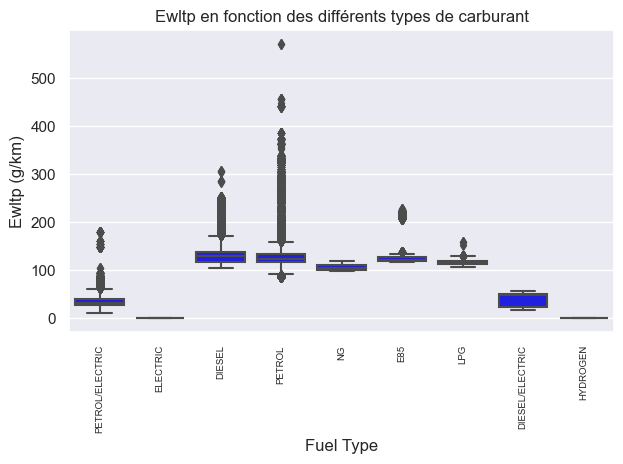

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

ax = sns.boxplot(x="Ft", y="Ewltp (g/km)", data=df_raw, color='blue')
plt.xlabel('Fuel Type')
plt.ylabel('Ewltp (g/km)')
plt.title('Ewltp en fonction des différents types de carburant')
plt.xticks(rotation=90, fontsize="xx-small")
plt.tight_layout()
plt.savefig("boxplot_ewltp_ft_raw_data.png")
plt.show()

In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [44]:
df.rename(columns={"Ewltp (g/km)": "Ewltp"}, inplace=True)

In [46]:
df.columns

Index(['Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve',
       'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp',
       'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)',
       'z (Wh/km)', 'IT', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf',
       'Status', 'year', 'Date of registration', 'Fuel consumption ',
       'Electric range (km)'],
      dtype='object')

In [48]:
df_vfn_Ewltp = df[["VFN", "Ewltp"]]
df_vfn_Ewltp

,VFN,Ewltp
ID,,
77798939,IP-DGY____EAT82552-VR3-0,30
77798940,IP-DGY____EAT82552-VR3-0,29
77798941,IP-DGY____EAT82552-VR3-0,30
77798942,IP-DGY____EAT82552-VR3-0,30
77798943,IP-DGY____EAT82552-VR3-0,29
...,...,...
77955107,IP-MQB37WZ_B0_0915-WAU-1,30
77955108,IP-MQB37WZ_B0_0916-WAU-1,30
77955109,IP-MQB37WZ_B2_0575-WAU-1,135


## ANOVA TEST

In [359]:
from sklearn.model_selection import train_test_split
X = df_vfn_Ewltp["VFN"]
y = df_vfn_Ewltp["Ewltp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

In [361]:
df_vfn_Ewltp_2 = pd.concat([X_train, y_train], axis=1)
df_vfn_Ewltp_2.shape

(16388, 2)

In [363]:
df_vfn_Ewltp_2

,VFN,Ewltp
ID,,
77570674,IP-YHZ____ATN8214B-VR3-0,118
76724707,IP-041177-KMH-1,114
77199161,IP-JAA1MTPJT4A_000-VF1-1,117
77484824,IP-HNP____MB6F1426-VF7-0,121
78007164,IP-BX72_2021_00007-WF0-1,129
...,...,...
77418376,IP-HNS____AT6_1430-VF7-0,140
77231246,IP-JAA1MTPJT4A_000-VF1-1,117
78125528,IP-MQB27SZ_A3_0537-WVW-1,131


In [365]:
anova_vfn = smf.ols("Ewltp ~ VFN", data=df_vfn_Ewltp_2).fit()
print(anova_vfn.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ewltp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:55:40   Log-Likelihood:                -31137.
No. Observations:               16388   AIC:                         6.471e+04
Df Residuals:                   15168   BIC:                         7.411e+04
Df Model:                        1219                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [371]:
sm.stats.anova_lm(anova_vfn, typ=2)

,sum_sq,df,F,PR(>F)
VFN,4.007153e+07,1219.0,11625.847402,0.0
Residual,4.288801e+04,15168.0,NaN,NaN


### Suppression des colonnes vide (100% de na)

In [50]:
df = df.drop([
    "MMS", 
    "Enedc (g/km)", 
    "Ernedc (g/km)",
    "Erwltp (g/km)",
    "De", 
    "Vf"], axis=1)

## Suppression des variables non pertinentes
+ **Country** cardinalité 1
+ **Status** car modalité = 1
+ **year**
+ **VFN** (Vehicle family identification number) => N'apporte pas d'information technique sur le modèle
+ **Mp** (Manufacturer pooling) => N'apporte pas d'information technique sur le modèle
+ **Mh** (Manufacturer name EU standard denomination) => N'apporte pas d'information technique sur le modèle
+ **Man** (Manufacturer name OEM declaration) => N'apporte pas d'information technique sur le modèle
+ **Tan** (Type approval number) => N'apporte pas d'information technique sur le modèle (<a href="https://single-market-economy.ec.europa.eu/sectors/automotive-industry/technical-harmonisation/faq-type-approval-vehicles_en?prefLang=fr&etrans=fr" target="_blank">En savoir plus</a>)
+ **T** (Type) => N'apporte pas d'information technique sur le modèle
+ **Va** (Variant) => N'apporte pas d'information technique sur le modèle
+ **Ve** (Version) => N'apporte pas d'information technique sur le modèle
+ **IT** (Innovative technology or group of innovative technologies) => N'apporte pas d'information technique sur le modèle
+ **Date of registration** => N'apporte pas d'information technique sur le modèle
+ **Mk** (Marque) => N'apporte pas d'information technique sur le modèle
+ **Cn** (Commercial name) => N'apporte pas d'information technique sur le modèle

In [53]:
df = df.drop([
    "Country", 
    "VFN", 
    "Mp", 
    "Mh", 
    "Man",
    "Tan", 
    "T",
    "Va", 
    "Ve",
    "Mk",
    "Cn", 
    "Ct",
    "r",
    "IT",
    "Status",
    "year", 
    "Date of registration"], axis=1)

In [55]:
df_na = pd.DataFrame(df.isna().sum()).reset_index()
df_na.rename({0: "NA"}, inplace=True, axis=1)
df_na["% NA"] = np.round((df_na["NA"]/ df.shape[0]) * 100, 2)
df_na

,index,NA,% NA
0,Cr,0,0.00
1,m (kg),0,0.00
2,Mt,0,0.00
3,Ewltp,0,0.00
4,W (mm),0,0.00
5,At1 (mm),0,0.00
6,At2 (mm),0,0.00
7,Ft,0,0.00
8,Fm,0,0.00
9,ec (cm3),210561,12.85


## Suppression de lignes pour les ELECTRIC et HYDROGEN

In [58]:
# suppression des lignes qui contiennent ELECTRIC HYDROGEN dans la colonne Ft
df = df.drop(df[(df["Ft"] == "ELECTRIC") | (df["Ft"] == "HYDROGEN")].index)

In [60]:
df.shape

(1428317, 14)

## Valeurs nulles après un premier nettoyage

In [63]:
df_na = pd.DataFrame(df.isna().sum()).reset_index()
df_na.rename({0: "NA"}, inplace=True, axis=1)
df_na["% NA"] = np.round((df_na["NA"]/ df.shape[0]) * 100, 2)
df_na

,index,NA,% NA
0,Cr,0,0.00
1,m (kg),0,0.00
2,Mt,0,0.00
3,Ewltp,0,0.00
4,W (mm),0,0.00
5,At1 (mm),0,0.00
6,At2 (mm),0,0.00
7,Ft,0,0.00
8,Fm,0,0.00
9,ec (cm3),0,0.00


### Analyse de z et Electric range (km)

In [66]:
z = df.loc[~df["z (Wh/km)"].isna()]

In [68]:
z[["Ft", "z (Wh/km)"]]["Ft"].unique()

array(['PETROL/ELECTRIC', 'DIESEL/ELECTRIC'], dtype=object)

### Remplacement pour z (Wh/km) et Electric range (km)

In [71]:
df["z (Wh/km)"] = df["z (Wh/km)"].fillna(0)
df["Electric range (km)"] = df["Electric range (km)"].fillna(0)

In [73]:
df_na = pd.DataFrame(df.isna().sum()).reset_index()
df_na.rename({0: "NA"}, inplace=True, axis=1)
df_na["% NA"] = np.round((df_na["NA"]/ df.shape[0]) * 100, 2)
df_na

,index,NA,% NA
0,Cr,0,0.0
1,m (kg),0,0.0
2,Mt,0,0.0
3,Ewltp,0,0.0
4,W (mm),0,0.0
5,At1 (mm),0,0.0
6,At2 (mm),0,0.0
7,Ft,0,0.0
8,Fm,0,0.0
9,ec (cm3),0,0.0


### Lignes dupliquées

In [76]:
df.shape

(1428317, 14)

In [78]:
# Détecter les doublons
df_duplicates = df.duplicated(keep="first")
# Afficher le nombre de lignes dupliquées
print(f"Nombre de lignes dupliquées : {df_duplicates.sum()}")

Nombre de lignes dupliquées : 1333323


### Suppression des lignes dupliquées

In [81]:
df.drop_duplicates(keep="first", inplace=True)

In [83]:
print("Lignes restantes: ", df.shape[0])

Lignes restantes:  94994


In [85]:
print(f"Nombre de lignes dupliquées au final: {df.duplicated().sum()}")

Nombre de lignes dupliquées au final: 0


In [87]:
df.shape

(94994, 14)

### Remplacement pour Erwltp (g/km)

In [90]:
# df["Erwltp (g/km)"] = df["Erwltp (g/km)"].fillna(df["Erwltp (g/km)"].mean())

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94994 entries, 77798939 to 77955102
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cr                   94994 non-null  object 
 1   m (kg)               94994 non-null  int64  
 2   Mt                   94994 non-null  int64  
 3   Ewltp                94994 non-null  int64  
 4   W (mm)               94994 non-null  int64  
 5   At1 (mm)             94994 non-null  int64  
 6   At2 (mm)             94994 non-null  int64  
 7   Ft                   94994 non-null  object 
 8   Fm                   94994 non-null  object 
 9   ec (cm3)             94994 non-null  float64
 10  ep (KW)              94994 non-null  int64  
 11  z (Wh/km)            94994 non-null  float64
 12  Fuel consumption     94994 non-null  float64
 13  Electric range (km)  94994 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 10.9+ MB


# Variables qualitatives

## Modalités

In [96]:
# variables qualitatives
df_cat = df[df.select_dtypes(include=["object"]).columns]

modalites = pd.DataFrame(df_cat.nunique(), df_cat.columns)
modalites

,0
Cr,2
Ft,7
Fm,5


## Répartition des données

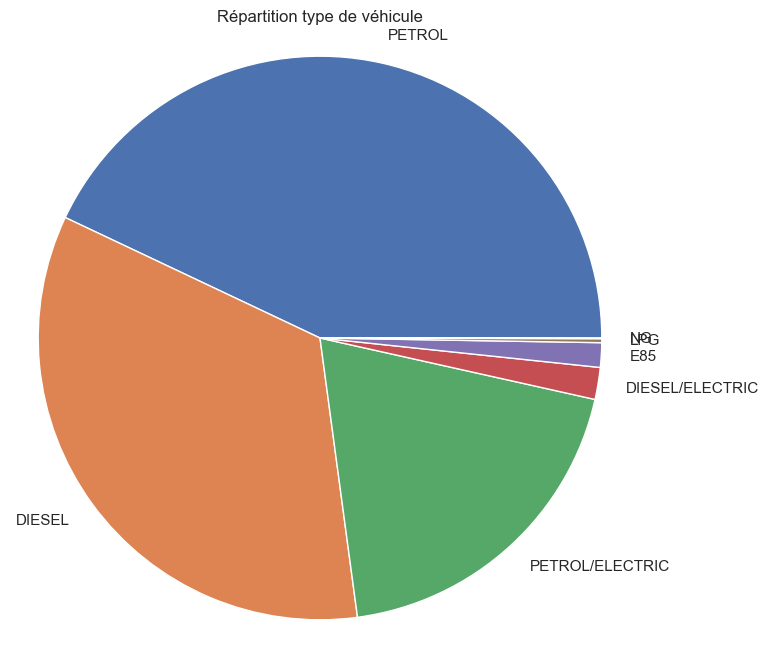

In [99]:
df_ft = pd.DataFrame(df["Ft"].value_counts()).reset_index()
df_ft
# Créer le graphique
plt.figure(figsize=(8, 8))  # Taille du graphique (ajustable)
plt.pie(x=df_ft["count"], labels=df_ft["Ft"])  # Angle de départ

# Options d'affichage (facultatif)
plt.title("Répartition type de véhicule")
plt.axis("equal")  # Garantit un camembert circulaire

# Afficher le graphique
plt.show()

In [101]:
df_ft

,Ft,count
0,PETROL,40819
1,DIESEL,32445
2,PETROL/ELECTRIC,18405
3,DIESEL/ELECTRIC,1740
4,E85,1333
5,LPG,215
6,NG,37


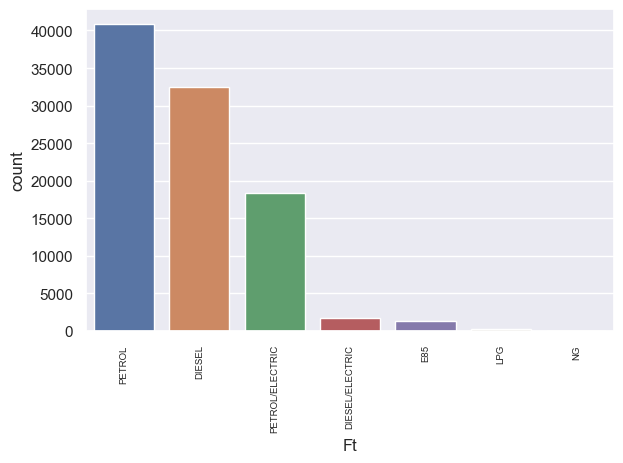

In [103]:
sns.barplot(data=df_ft, x="Ft", y="count")
plt.xlabel("Ft")
plt.xticks(rotation=90, fontsize="xx-small")
plt.tight_layout()
plt.savefig("repartition_fuel_type.png")
plt.show()

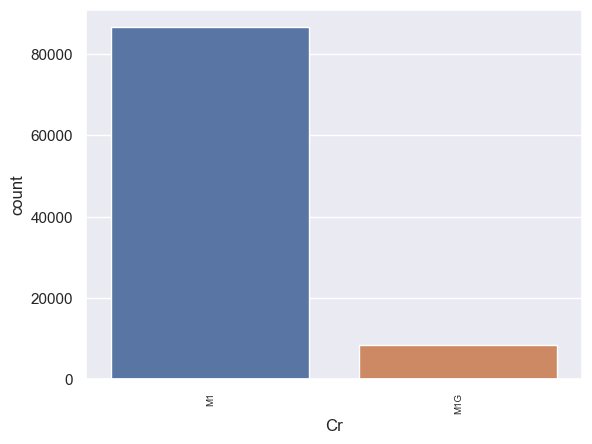

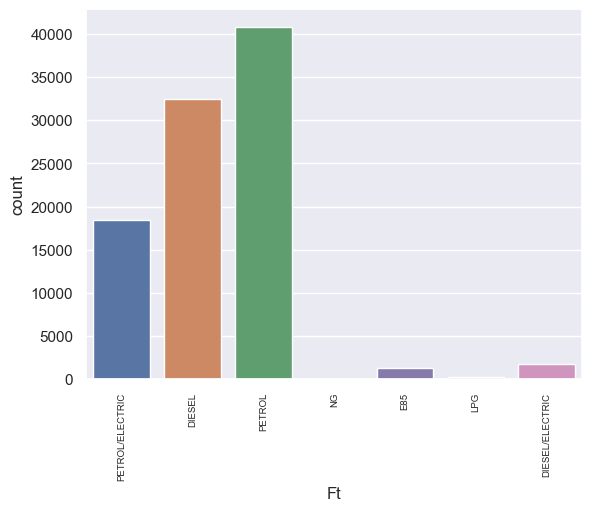

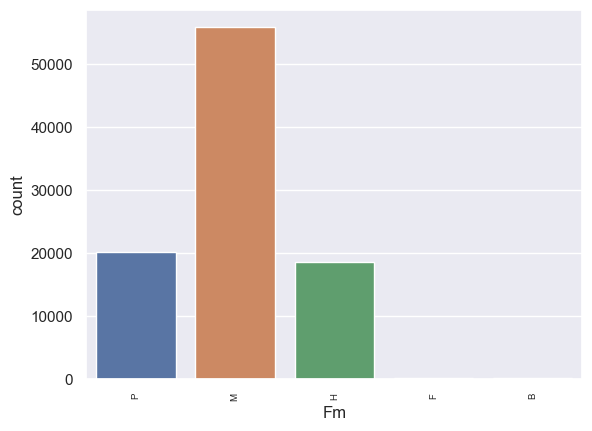

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
df_cat = df[df.select_dtypes(include=["object"]).columns]
for col in df_cat:
    if col != "ID":
        sns.countplot(data=df, x=col)
        plt.xlabel(col)
        plt.xticks(rotation=90, fontsize="xx-small")
        plt.show()

# Variables quantitatives

## Description des données

In [109]:
df.describe()

,m (kg),Mt,Ewltp,W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Fuel consumption,Electric range (km)
count,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000,94994.000000
mean,1642.860844,1782.996252,122.247974,2730.907973,1578.650936,1576.828926,1740.813462,126.113039,40.966608,5.100526,12.700265
std,320.189801,339.360289,49.768525,147.745323,46.317369,53.929577,518.001335,53.612853,81.199382,2.093404,25.476494
min,570.000000,616.000000,12.000000,2000.000000,1220.000000,1301.000000,658.000000,44.000000,0.000000,0.500000,0.000000
25%,1421.000000,1552.000000,117.000000,2639.000000,1554.000000,1545.000000,1461.000000,96.000000,0.000000,4.700000,0.000000
50%,1596.000000,1733.000000,135.000000,2681.000000,1575.000000,1570.000000,1598.000000,110.000000,0.000000,5.600000,0.000000
75%,1812.000000,1954.000000,149.000000,2830.000000,1602.000000,1613.000000,1984.000000,140.000000,0.000000,6.300000,0.000000
max,2866.000000,3150.000000,571.000000,3665.000000,1776.000000,1758.000000,7993.000000,1103.000000,347.000000,25.200000,128.000000


In [111]:
df_num = df[df.select_dtypes(include=["int64", "float64"]).columns]


In [113]:
df_cat["Ft"].unique()

array(['PETROL/ELECTRIC', 'DIESEL', 'PETROL', 'NG', 'E85', 'LPG',
       'DIESEL/ELECTRIC'], dtype=object)

# Heatmap

<Figure size 640x480 with 0 Axes>

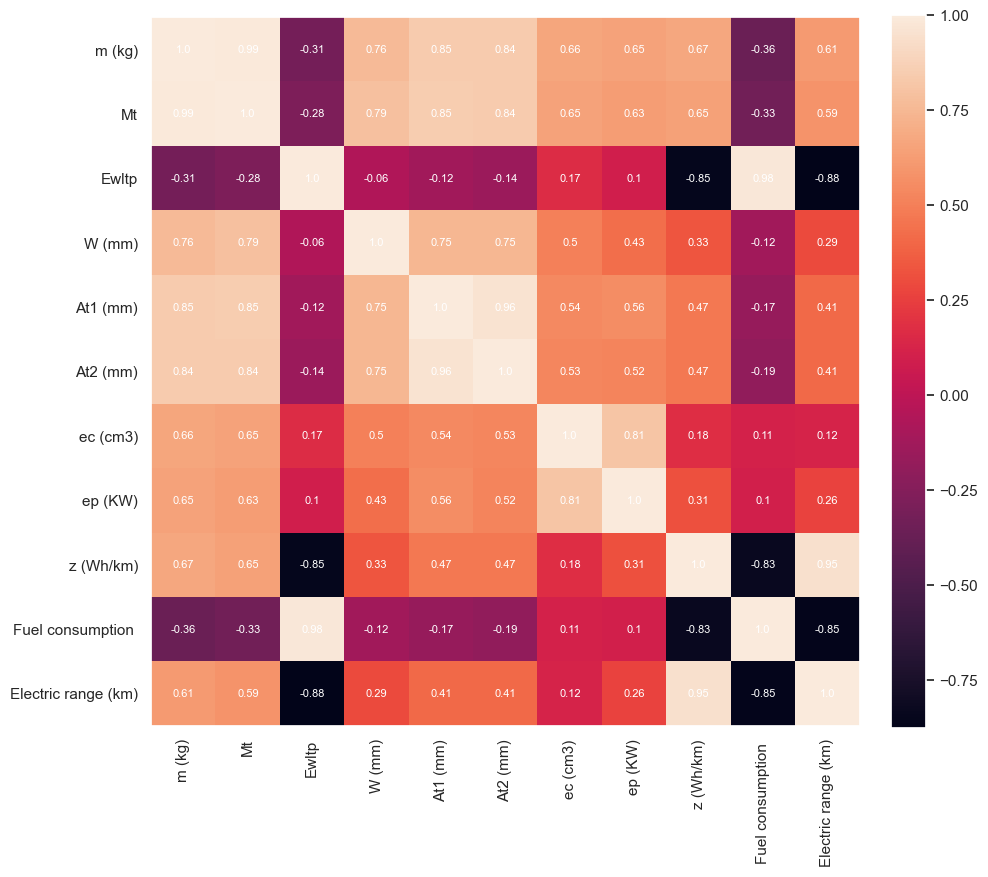

In [116]:
df_num = df[df.select_dtypes(include=["int64", "float64"]).columns]
correlation_matrix = df_num.corr()
hp_size = 10
plt.clf()
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots()
fig.set_figheight(hp_size)
fig.set_figwidth(hp_size)
im = ax.imshow(correlation_matrix)
ax.set_xticks(np.arange(len(correlation_matrix)), labels=df_num.columns, rotation=90)
ax.set_yticks(np.arange(len(correlation_matrix)), labels=df_num.columns)

for i in range(len(df_num.columns)):
    for j in range(len(df_num.columns)):
        text = ax.text(j, i, np.around(np.array(correlation_matrix)[i, j], 2), ha="center", va="center", color="w", size=8, rotation=0)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# sns.heatmap(correlations, annot=True, fmt=".2f", linewidth=.5, cmap="inferno")
plt.show()

# Graphes de répartition

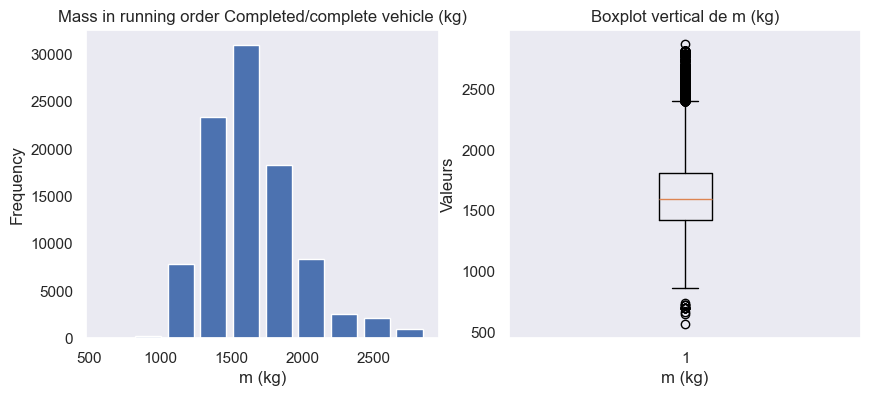

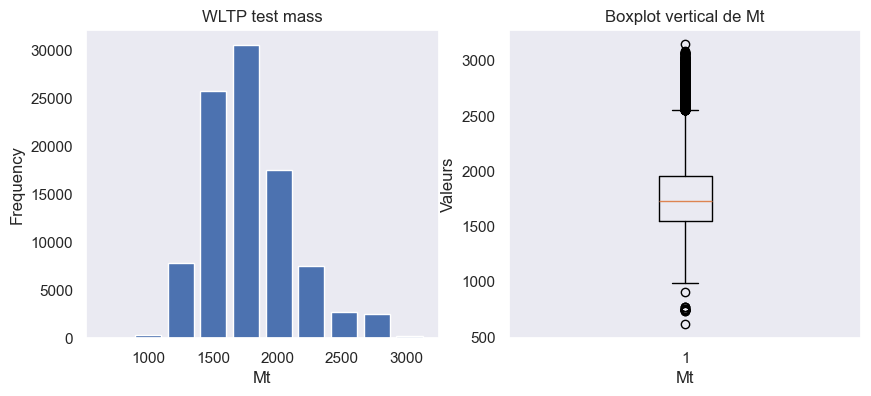

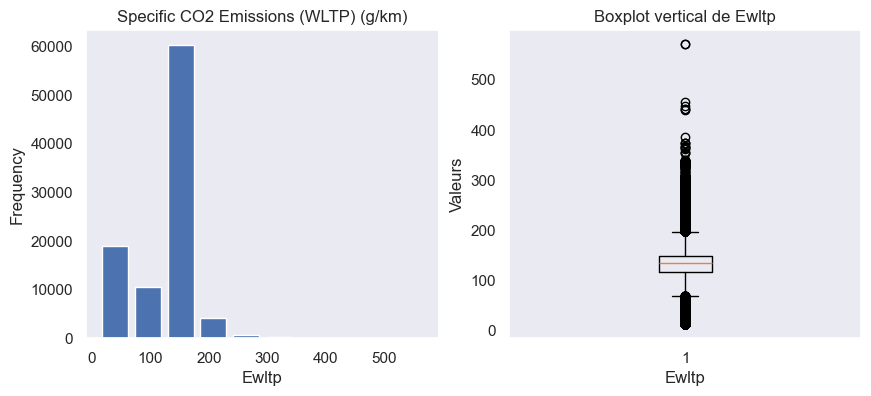

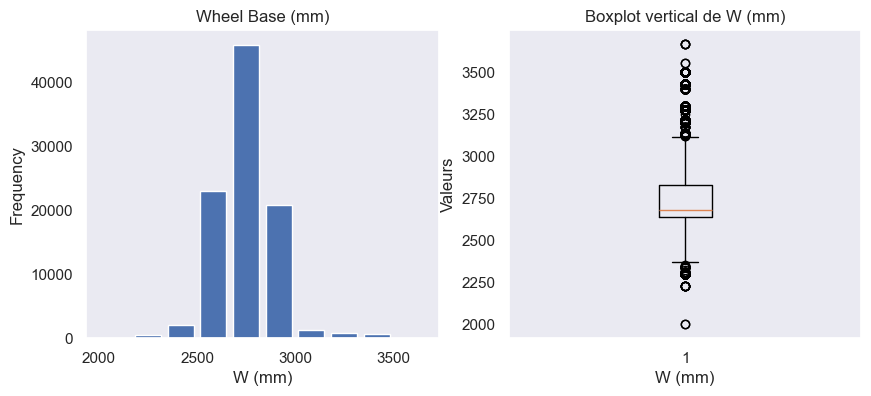

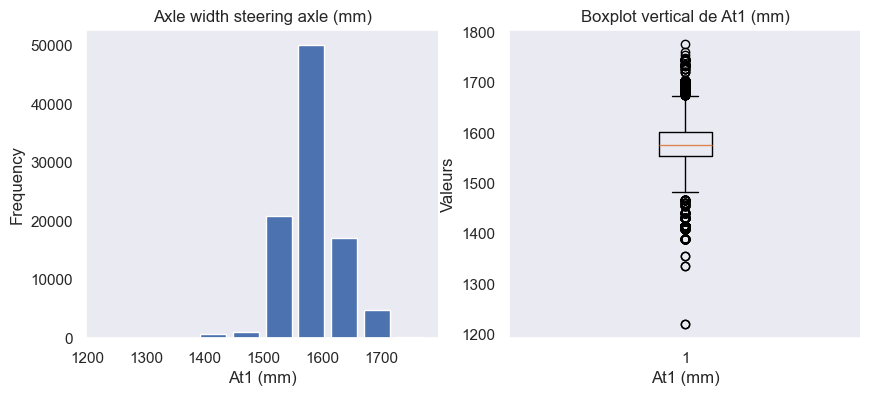

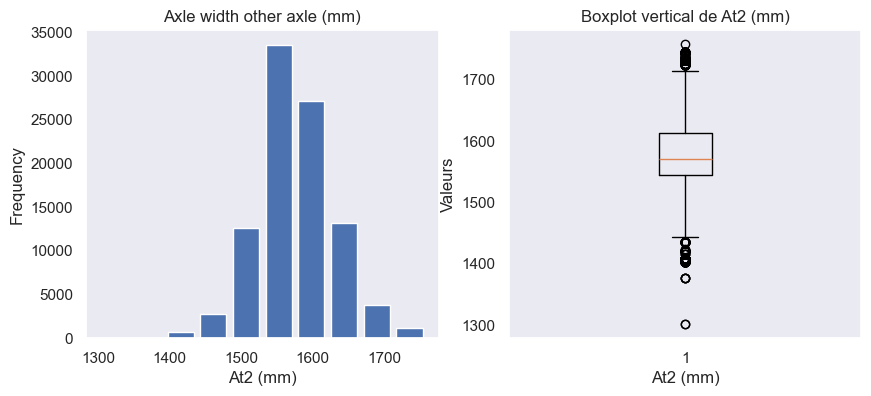

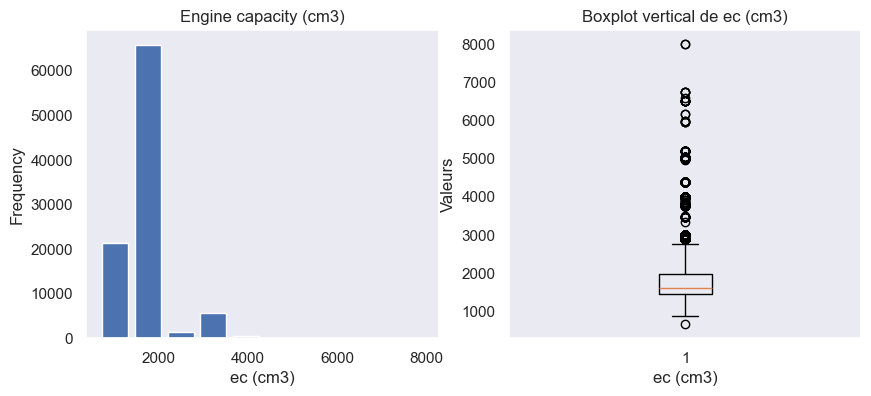

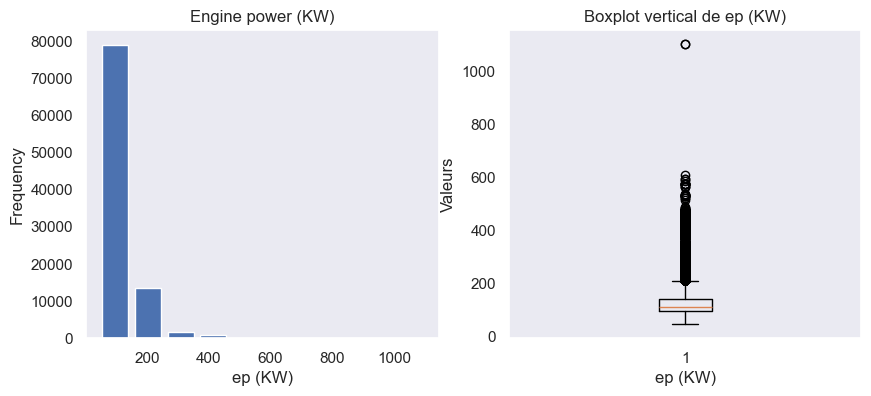

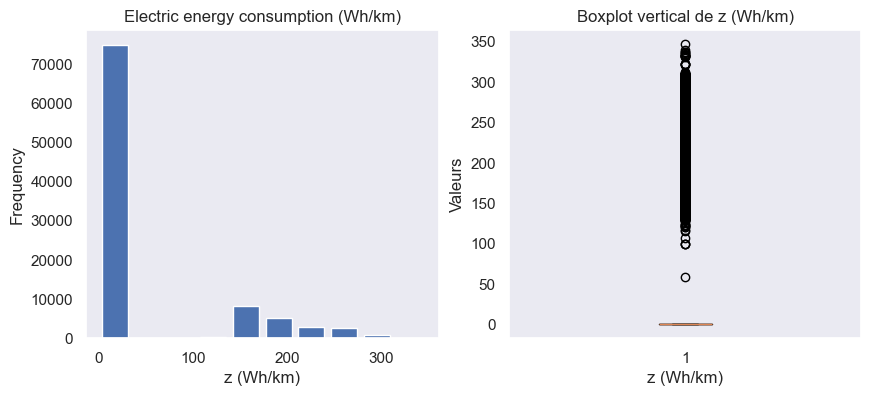

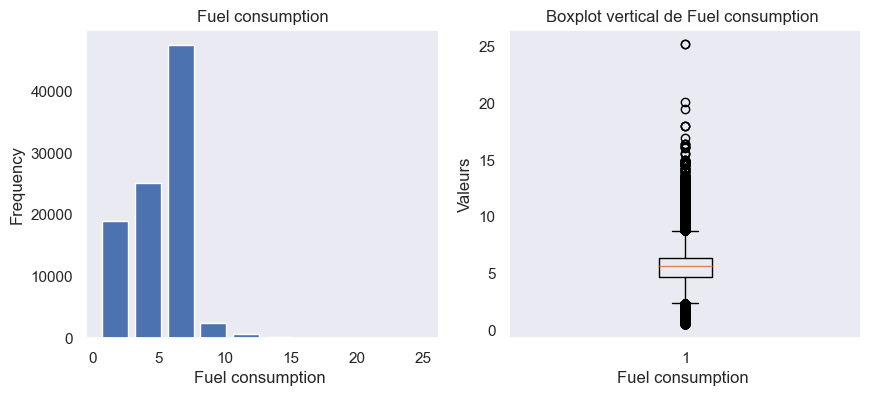

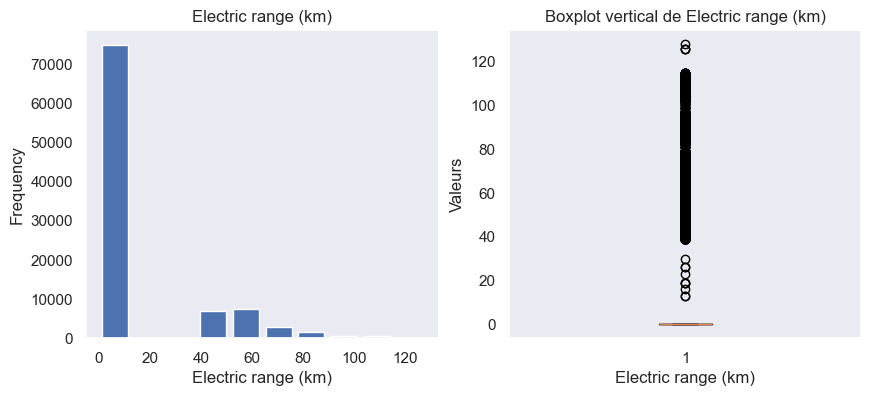

In [119]:
labels = {
    "m (kg)": "Mass in running order Completed/complete vehicle (kg)",
    "Mt": "WLTP test mass",
    "Ewltp": "Specific CO2 Emissions (WLTP) (g/km)",
    "At1 (mm)": "Axle width steering axle (mm)",
    "At2 (mm)": "Axle width other axle (mm)",
    "ec (cm3)": "Engine capacity (cm3)",
    "ep (KW)": "Engine power (KW)",
    "z (Wh/km)": "Electric energy consumption (Wh/km)",
    "Ewltp (g/km)": "Specific CO2 Emissions (WLTP) (g/km)",
    "Fuel consumption ": "Fuel consumption",
    "Electric range (km)": "Electric range (km)",
    "W (mm)": "Wheel Base (mm)",
    "Erwltp (g/km)": "Emissions reduction through innovative technologies"
}

for col in df_num:
    plt.figure(figsize=(10, 4))  # Create a new figure for each histogram
    plt.subplot(121)
    plt.hist(df_num[col], rwidth=0.8)
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel("Frequency")  # Set the y-axis label
    plt.title(f"{labels[col]}")  # Set the title
    
    plt.subplot(122)
    plt.boxplot(df_num[col], vert=True)  # Afficher le boxplot verticalement
    plt.xlabel(col)  # Définir l'étiquette de l'axe des x
    plt.ylabel("Valeurs")  # Définir l'étiquette de l'axe des y
    plt.title(f"Boxplot vertical de {col}")  # Définir le titre
    
    plt.show()

# Etude des valeurs extrêmes

## Fuel consumption

In [49]:
df_raw.loc[df_raw["Fuel consumption "] > 15]["Mk"].unique()

array(['BUGATTI', 'MERCEDES BENZ', 'MERCEDES AMG', 'FERRARI',
       'LAMBORGHINI', 'MASERATI', 'ROLLS ROYCE'], dtype=object)

In [50]:
df_q_25 = df # .loc[df["Fuel consumption "] > df["Fuel consumption "].quantile(q=0.75)].sort_values(by="Fuel consumption ")
df_q_25

,Cr,m (kg),Mt,Ewltp,W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Fuel consumption,Electric range (km)
ID,,,,,,,,,,,,,,
77798939,M1,1797,1888,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798940,M1,1797,1876,29,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,60.0
77798941,M1,1797,1886,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798942,M1,1797,1895,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798943,M1,1797,1874,29,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77955023,M1,1395,1530,128,2624,1539,1526,PETROL,H,1498.0,110,0.0,5.6,0.0
77955065,M1,1395,1550,134,2624,1539,1526,PETROL,H,1498.0,110,0.0,5.9,0.0
77955080,M1,1395,1559,136,2624,1539,1526,PETROL,H,1498.0,110,0.0,6.0,0.0


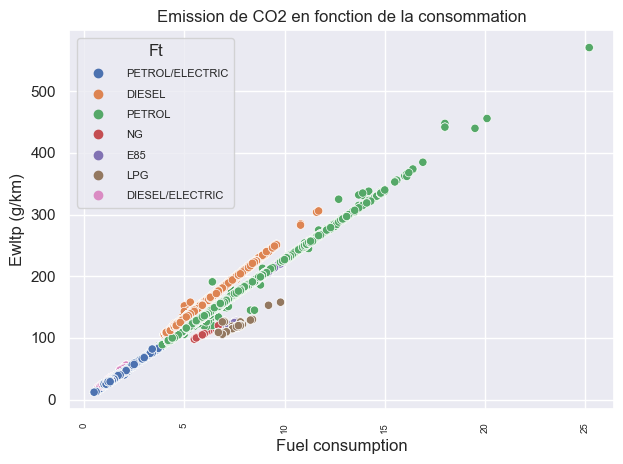

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

gfg =sns.scatterplot(data=df, x="Fuel consumption ", y="Ewltp", hue="Ft")
plt.xlabel('Fuel consumption')
plt.ylabel('Ewltp (g/km)')
plt.title('Emission de CO2 en fonction de la consommation')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.tight_layout()
plt.savefig("emmission_consommation.png")
plt.show()

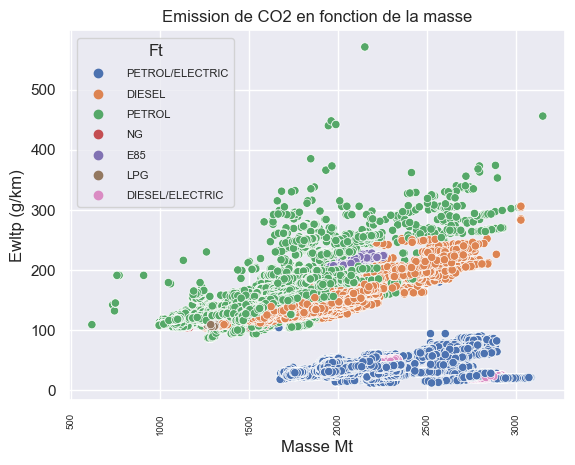

In [52]:
sns.set()

gfg =sns.scatterplot(data=df, x="Mt", y="Ewltp", hue="Ft")
plt.xlabel('Masse Mt')
plt.ylabel('Ewltp (g/km)')
plt.title('Emission de CO2 en fonction de la masse')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.show()

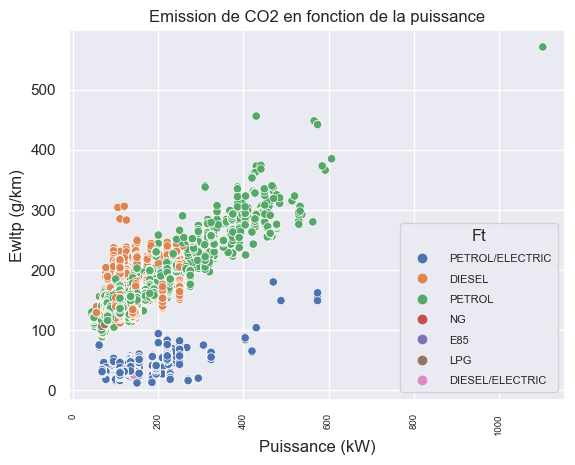

In [53]:
sns.set()

gfg =sns.scatterplot(data=df, x="ep (KW)", y="Ewltp", hue="Ft")
plt.xlabel('Puissance (kW)')
plt.ylabel('Ewltp (g/km)')
plt.title('Emission de CO2 en fonction de la puissance')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.show()

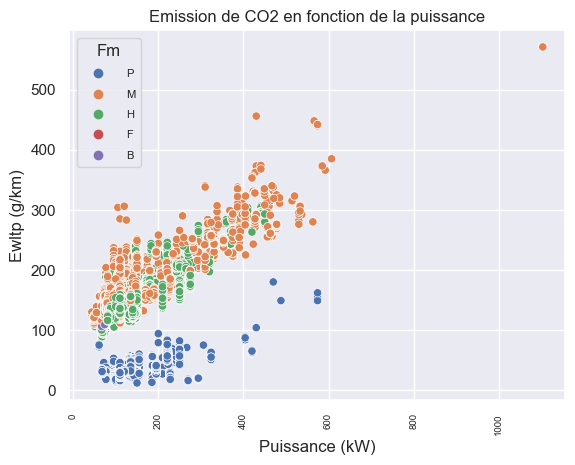

In [54]:
sns.set()

gfg =sns.scatterplot(data=df, x="ep (KW)", y="Ewltp", hue="Fm")
plt.xlabel('Puissance (kW)')
plt.ylabel('Ewltp (g/km)')
plt.title('Emission de CO2 en fonction de la puissance')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.show()

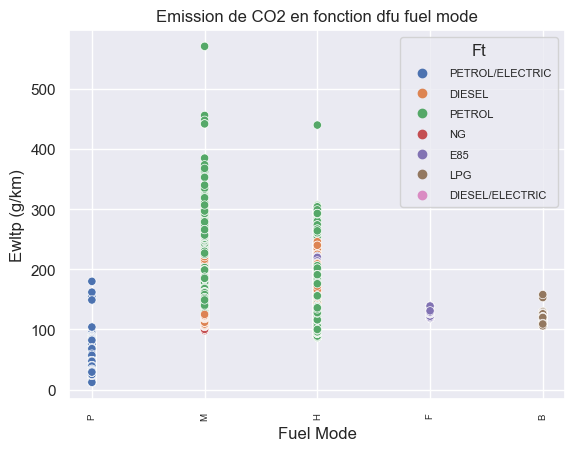

In [55]:
sns.set()

gfg =sns.scatterplot(data=df, x="Fm", y="Ewltp", hue="Ft")
plt.xlabel('Fuel Mode')
plt.ylabel('Ewltp (g/km)')
plt.title('Emission de CO2 en fonction dfu fuel mode')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.show()

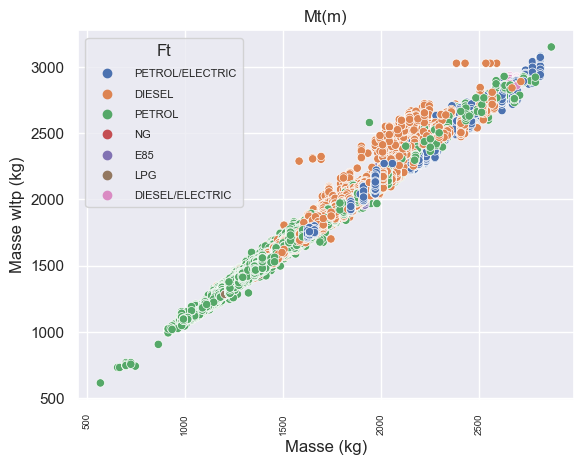

In [60]:
sns.set()

gfg =sns.scatterplot(data=df, x="m (kg)", y="Mt", hue="Ft")
plt.xlabel('Masse (kg)')
plt.ylabel('Masse wltp (kg)')
plt.title('Mt(m)')
plt.xticks(rotation=90, fontsize="xx-small")
plt.setp(gfg.get_legend().get_texts(), fontsize='8')
plt.show()

# Encodage des variables

In [56]:
df_encode = pd.get_dummies(df, dtype=int)

cols = {
    "m (kg)": "m",
    "W (mm)": "W",
    "At1 (mm)": "At1",
    "At2 (mm)": "At2",
    "ec (cm3)": "ec",
    "ep (KW)": "ep",
    "z (Wh/km)": "z",
    "Fuel consumption ": "Fuel_consumption", # Attention, dans le fichier original, il y a un espace à la fin du nom du champ
    "Electric range (km)": "Electric_range"
}

df_encode.rename(columns=cols, inplace=True)

In [57]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94994 entries, 77798939 to 77955102
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   m                   94994 non-null  int64  
 1   Mt                  94994 non-null  int64  
 2   Ewltp               94994 non-null  int64  
 3   W                   94994 non-null  int64  
 4   At1                 94994 non-null  int64  
 5   At2                 94994 non-null  int64  
 6   ec                  94994 non-null  float64
 7   ep                  94994 non-null  int64  
 8   z                   94994 non-null  float64
 9   Fuel_consumption    94994 non-null  float64
 10  Electric_range      94994 non-null  float64
 11  Cr_M1               94994 non-null  int32  
 12  Cr_M1G              94994 non-null  int32  
 13  Ft_DIESEL           94994 non-null  int32  
 14  Ft_DIESEL/ELECTRIC  94994 non-null  int32  
 15  Ft_E85              94994 non-null  int32  
 16 

In [58]:
df_encode

,m,Mt,Ewltp,W,At1,At2,ec,ep,z,Fuel_consumption,Electric_range,Cr_M1,Cr_M1G,Ft_DIESEL,Ft_DIESEL/ELECTRIC,Ft_E85,Ft_LPG,Ft_NG,Ft_PETROL,Ft_PETROL/ELECTRIC,Fm_B,Fm_F,Fm_H,Fm_M,Fm_P
ID,,,,,,,,,,,,,,,,,,,,,,,,,
77798939,1797,1888,30,2785,1600,1605,1598.0,132,159.0,1.3,59.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
77798940,1797,1876,29,2785,1600,1605,1598.0,132,159.0,1.3,60.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
77798941,1797,1886,30,2785,1600,1605,1598.0,132,159.0,1.3,59.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
77798942,1797,1895,30,2785,1600,1605,1598.0,132,159.0,1.3,59.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
77798943,1797,1874,29,2785,1600,1605,1598.0,132,159.0,1.3,60.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77955023,1395,1530,128,2624,1539,1526,1498.0,110,0.0,5.6,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
77955065,1395,1550,134,2624,1539,1526,1498.0,110,0.0,5.9,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
77955080,1395,1559,136,2624,1539,1526,1498.0,110,0.0,6.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


## SAUVEGARDE du fichier nettoyé

In [59]:
df.to_csv("./csv/data_2022_cleaned.csv")